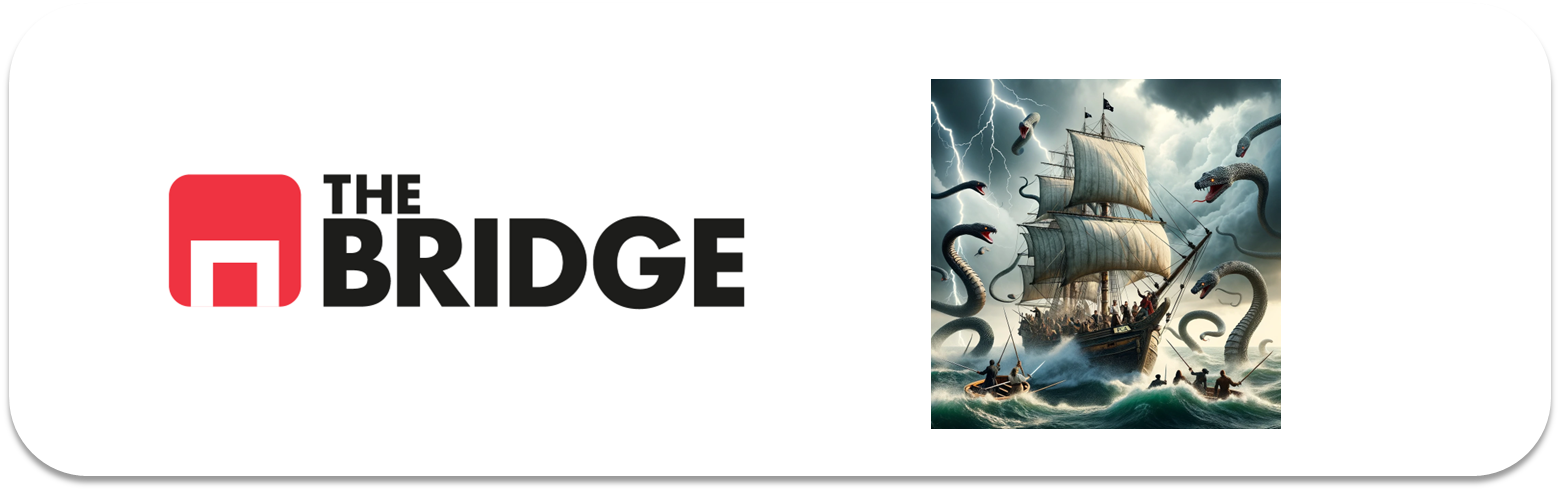

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Importamos librerías
# # Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import bootcampviztools as bt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [2]:
# Importamos nuestro DataSet
df = pd.read_csv("./data/credit_npo.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
# Eliminamos filas con nulos
df = df.dropna()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,11816.0,0.070244,0.255568,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,11816.0,0.335668,0.365209,0.0,0.034927,0.179183,0.587187,6.0
age,11816.0,51.447698,14.516270,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,11816.0,0.340471,2.927409,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,11816.0,0.499708,2.696067,0.0,0.143456,0.294748,0.477414,96.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,11816.0,8.759140,5.129772,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,11816.0,0.180010,2.892577,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,11816.0,1.059580,1.140716,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,11816.0,0.149712,2.868248,0.0,0.000000,0.000000,0.000000,98.0


In [4]:
# Calculamos frecuencias y cardinalidad

def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    return df_temp


df_tipo = card_tipo(df)
print(df_tipo)

                                       Card     %_Card     Tipo  \
SeriousDlqin2yrs                          2   0.016926    int64   
RevolvingUtilizationOfUnsecuredLines  10314  87.288422  float64   
age                                      78   0.660122    int64   
NumberOfTime30-59DaysPastDueNotWorse     10   0.084631    int64   
DebtRatio                             11472  97.088693  float64   
MonthlyIncome                          4167  35.265741  float64   
NumberOfOpenCreditLinesAndLoans          43   0.363913    int64   
NumberOfTimes90DaysLate                  13    0.11002    int64   
NumberRealEstateLoansOrLines             16    0.13541    int64   
NumberOfTime60-89DaysPastDueNotWorse      8   0.067705    int64   
NumberOfDependents                       10   0.084631  float64   

                                          tipo_sugerido  
SeriousDlqin2yrs                                Binaria  
RevolvingUtilizationOfUnsecuredLines  Numerica continua  
age                  

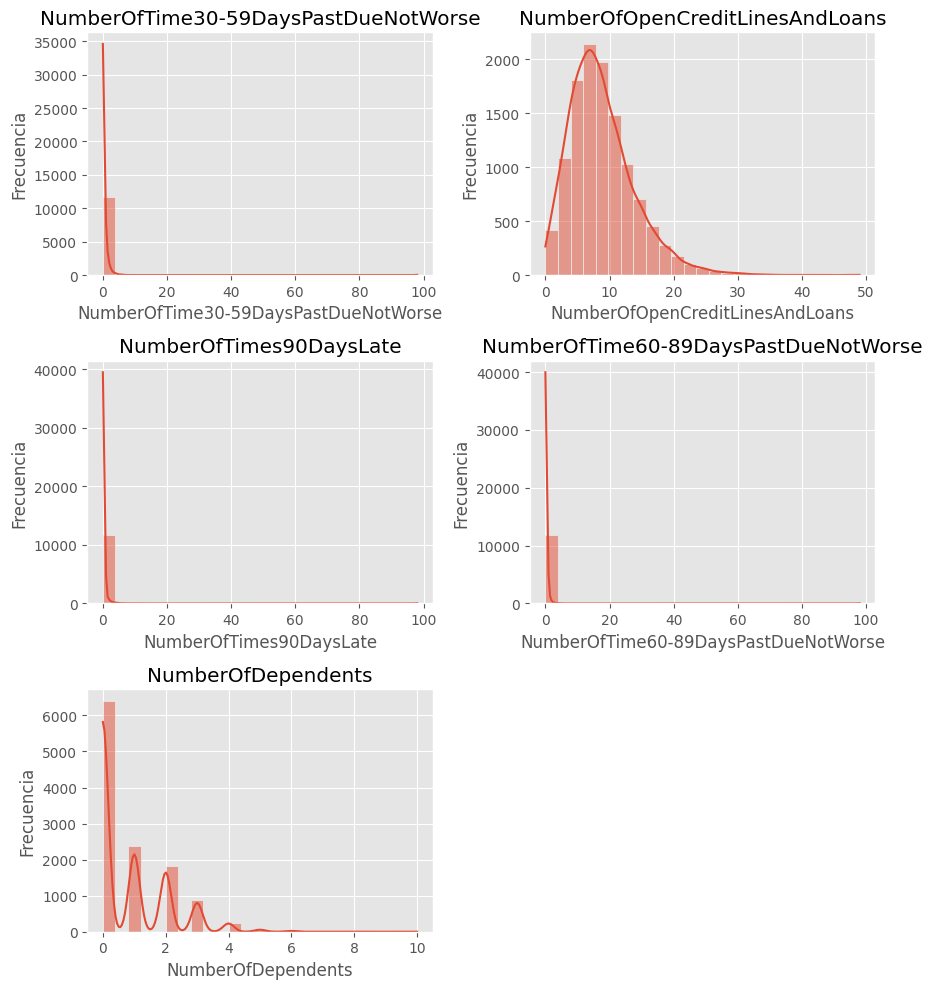

In [5]:
# Todas las columnas 'NumberOf' son numéricas así que podemos pintar una distribución y ver cómo se reparten sus datos
def plotNumberof(df):
    numberof_cols = [col for col in df.columns if col.startswith('NumberOf')]

    fig, axs = plt.subplots(3, 2, figsize=(9, 10))
    axs = axs.flatten()

    for i, col in enumerate(numberof_cols[:6]):  # Limita a 6 variables por el subplot
        sns.histplot(df[col],  # divide por 1000 si es necesario, o quítalo
                    kde=True,
                    bins=25,
                    ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel("Frecuencia")

    # Ocultar ejes vacíos si hay menos de 6 variables
    for j in range(len(numberof_cols), 6):
        fig.delaxes(axs[j])  # o axs[j].axis('off')

    plt.tight_layout()
    plt.show()

plotNumberof(df)

In [6]:
# Vamos utilizar 2 niveles en función del riesgo.
# Negocio establece dos niveles, riesgo bajo, risgo alto, con las frecuencia de cada variable que está dispuesta a asumir.
#   - NumberOfTime6089DaysPastDueNotWorse:
#     1. Riesgo bajo: <=4
#     2. Riesgo alto: > 4
#   - Number of dependents:
#     1. Riesgo bajo: <=1
#     2. Riesgo alto: > 2

df['NumberOfOpenCreditLinesAndLoans'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'],
                            bins=[-1, 4, df['NumberOfOpenCreditLinesAndLoans'].max()],
                            labels=['Riesgo Bajo', 'Riesgo Alto'])
df['NumberOfDependents'] = pd.cut(df['NumberOfDependents'],
                            bins=[-1, 1, df['NumberOfDependents'].max()],
                            labels=['Riesgo Bajo', 'Riesgo Alto'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64   
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  category
 7   NumberOfTimes90DaysLate               11816 non-null  int64   
 8   NumberRealEstateLoansOrLines          11816 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64   
 10  NumberOfDependents                    11816 non-null  category
dtypes: cate

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,Riesgo Alto,1,0,0,Riesgo Bajo
1,0,0.023413,74,0,0.209197,4870.0,Riesgo Alto,0,1,0,Riesgo Bajo
2,0,0.000000,43,0,0.080784,5000.0,Riesgo Bajo,0,0,0,Riesgo Alto
3,0,0.492754,44,0,0.412735,7333.0,Riesgo Bajo,0,2,0,Riesgo Alto
4,0,1.000000,63,0,0.000000,8333.0,Riesgo Bajo,0,0,0,Riesgo Bajo


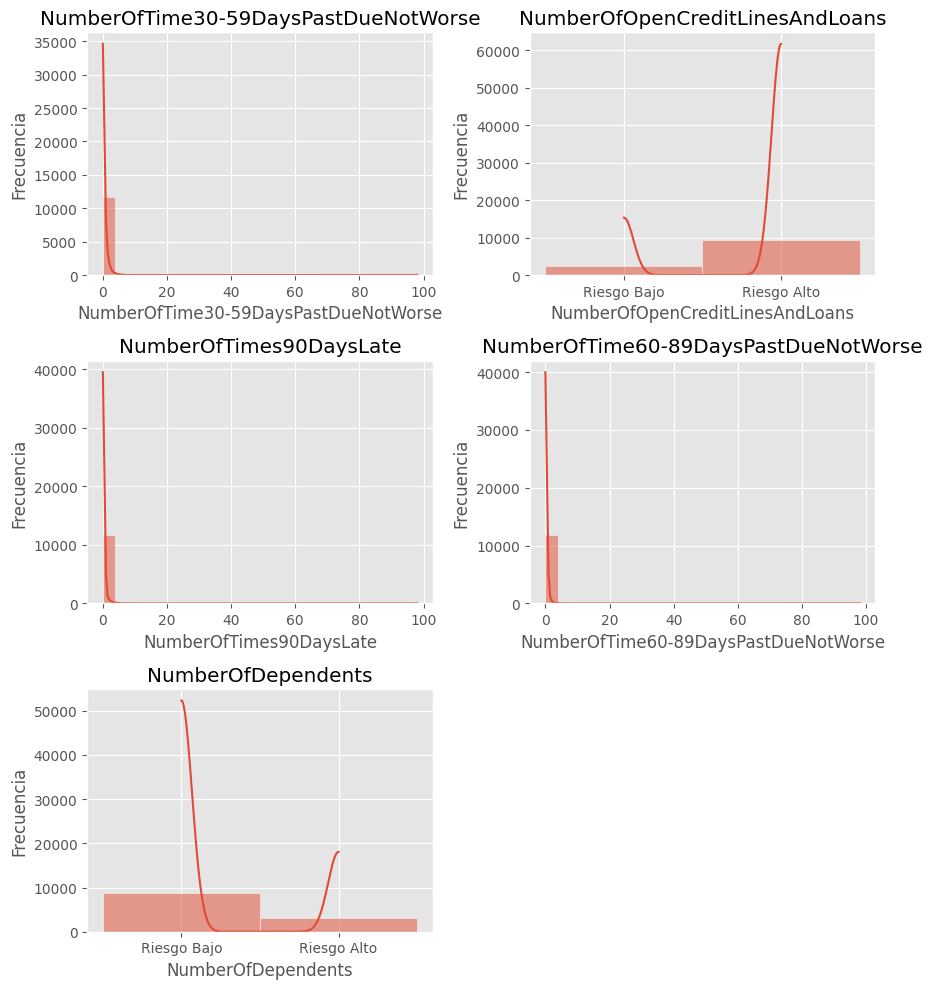

In [7]:
# Volvemos a graficar y ver cómo han quedado nuestras variables
plotNumberof(df)

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).
* Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

In [8]:
# Análisis visual
# Calculamos nuevamente la cardinalidad pues hemos discretizado en el paso previo algunas features
df_tipo = card_tipo(df)


target="SeriousDlqin2yrs"
# Identificamos en listas el tipo de feature para nuestro análisis bivariante
var_categoricas = df_tipo[df_tipo["tipo_sugerido"].isin(["Categorica", "Binaria"])].index.tolist()
var_numericas = df_tipo[df_tipo["tipo_sugerido"].str.startswith("Numerica")].index.tolist()
variables = var_numericas + var_numericas
# Eliminamos nuestro target de las listas generadas
def eliminar_target(lista, target):
    return [x for x in lista if x != target]

var_categoricas = eliminar_target(var_categoricas, target)
var_numericas = eliminar_target(var_numericas, target)
variables = eliminar_target(variables, target)

print(var_categoricas)
print(var_numericas)

['NumberOfOpenCreditLinesAndLoans', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines']


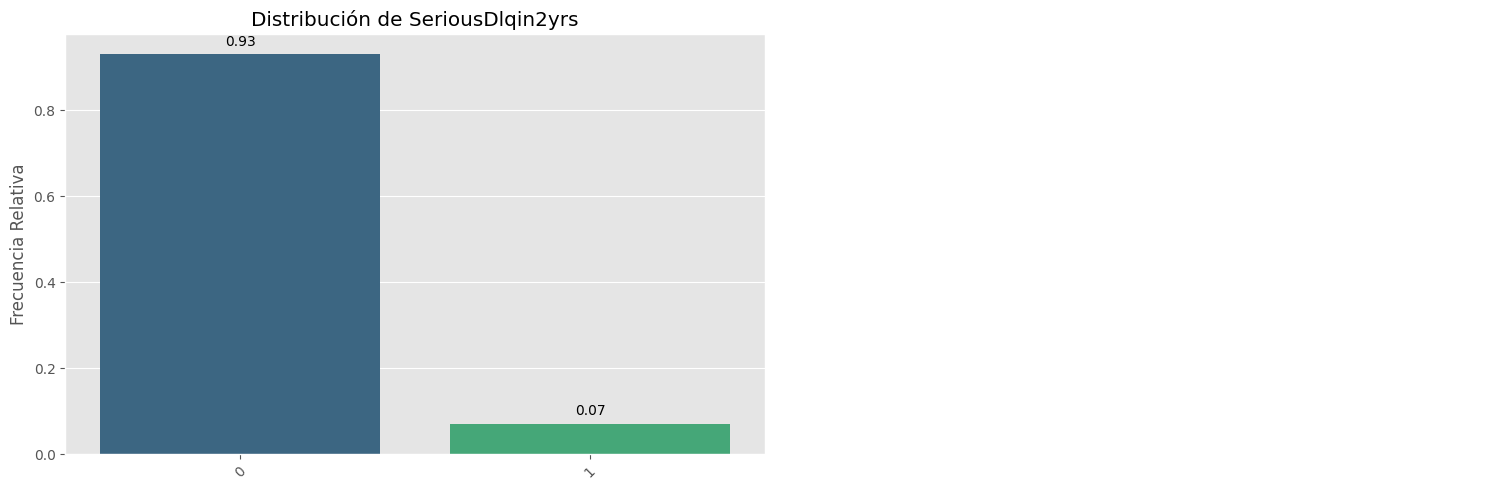

In [9]:
# Graficamos nuestra variable target
bt.pinta_distribucion_categoricas(df, [target], relativa= True, mostrar_valores=True)

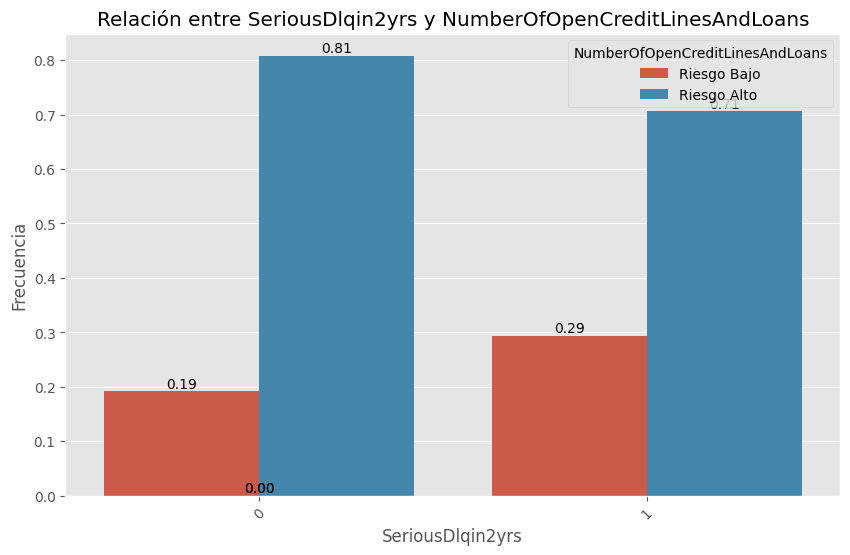

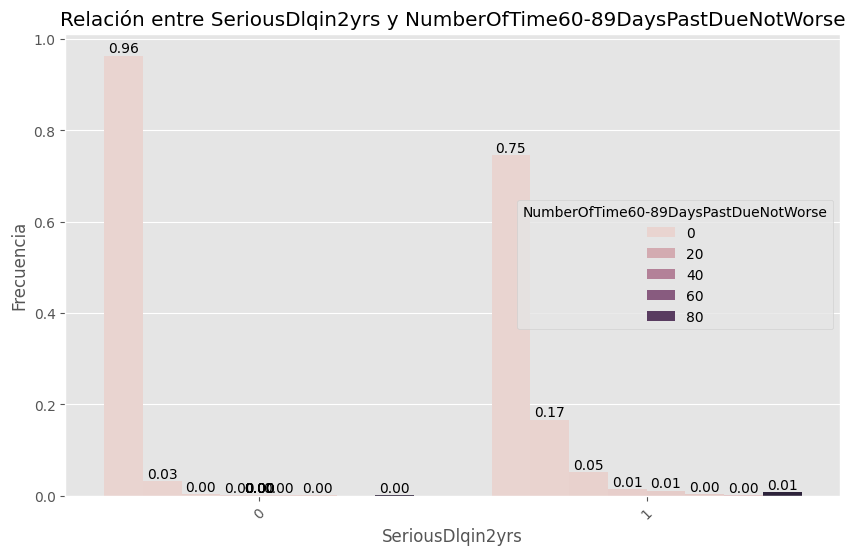

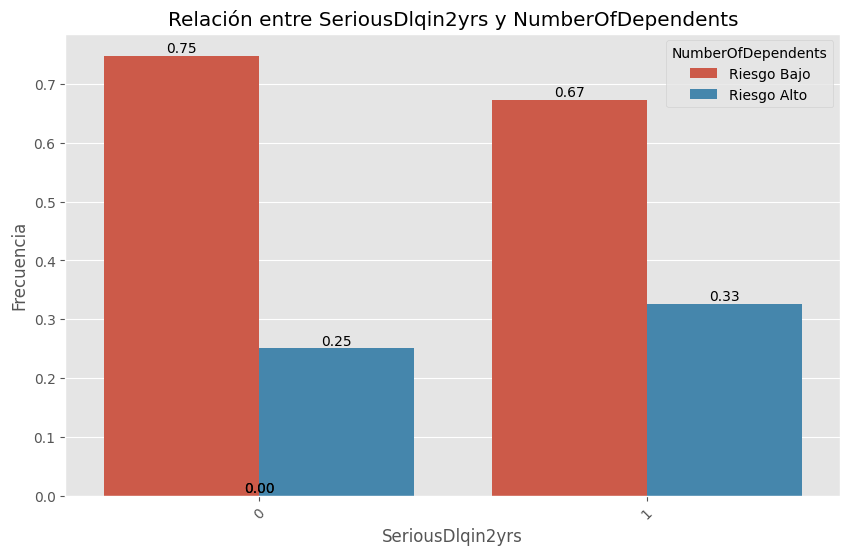

In [10]:
# Análisis bivariante categórica-categórica(target).
for col in var_categoricas:
    bt.plot_categorical_relationship_fin(df,target,col,show_values= True, relative_freq= True)

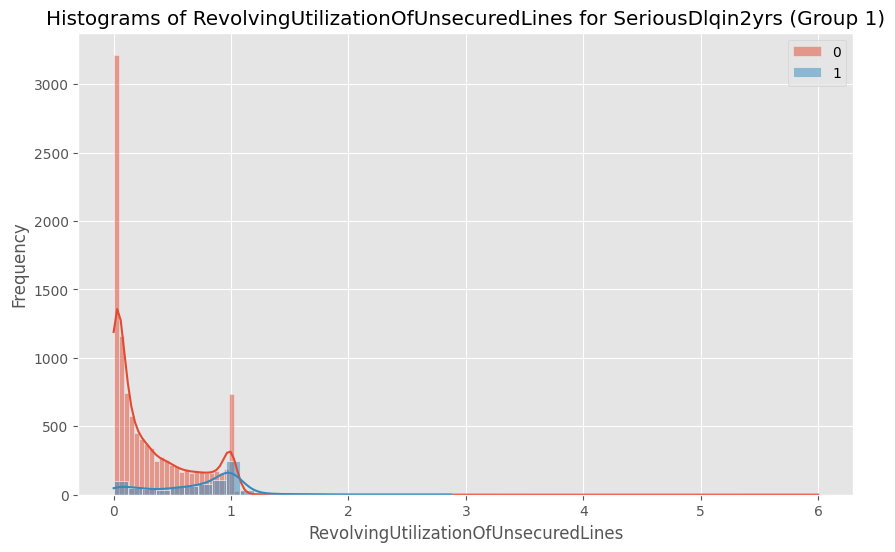

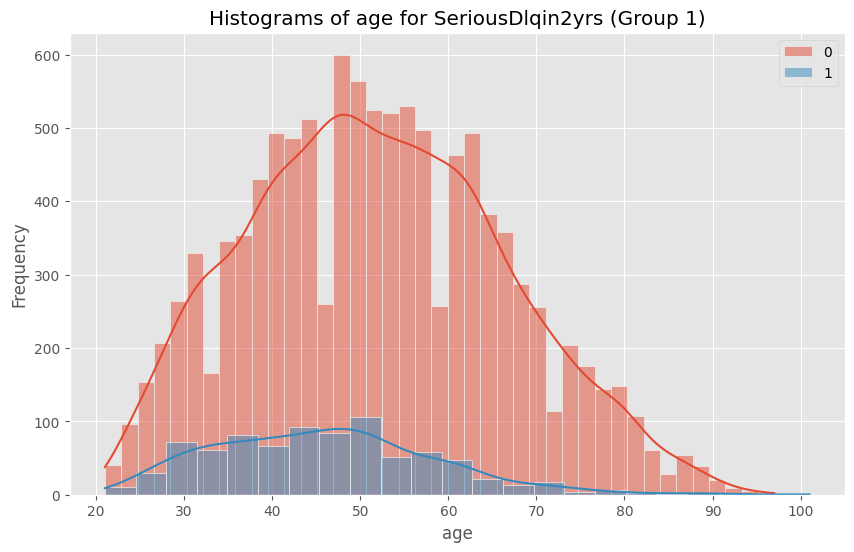

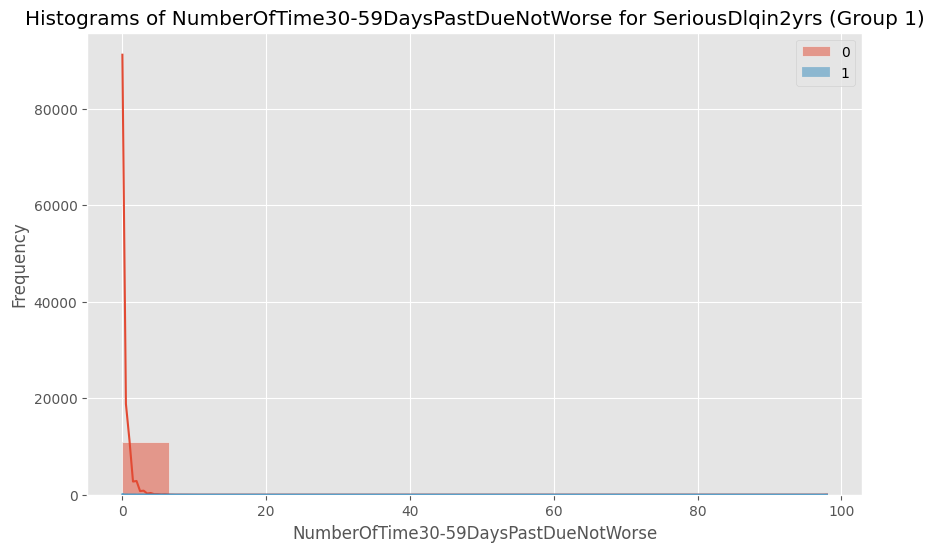

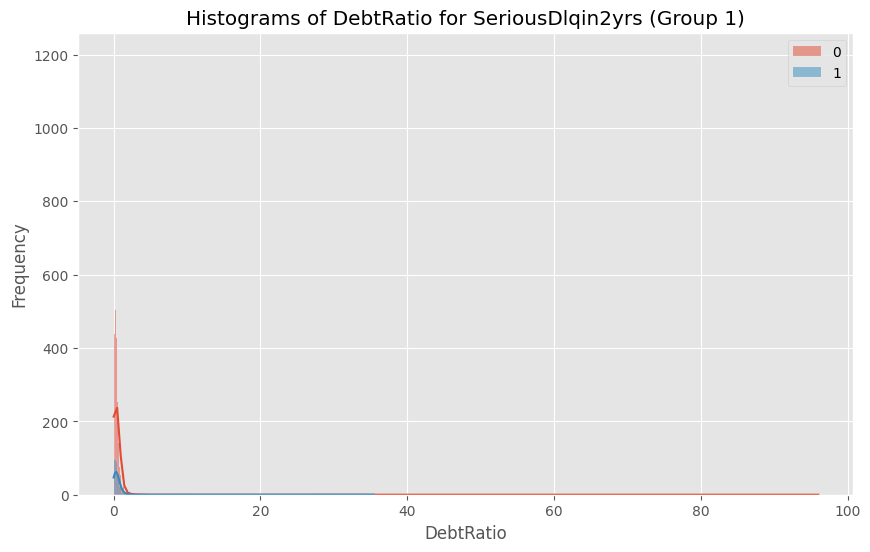

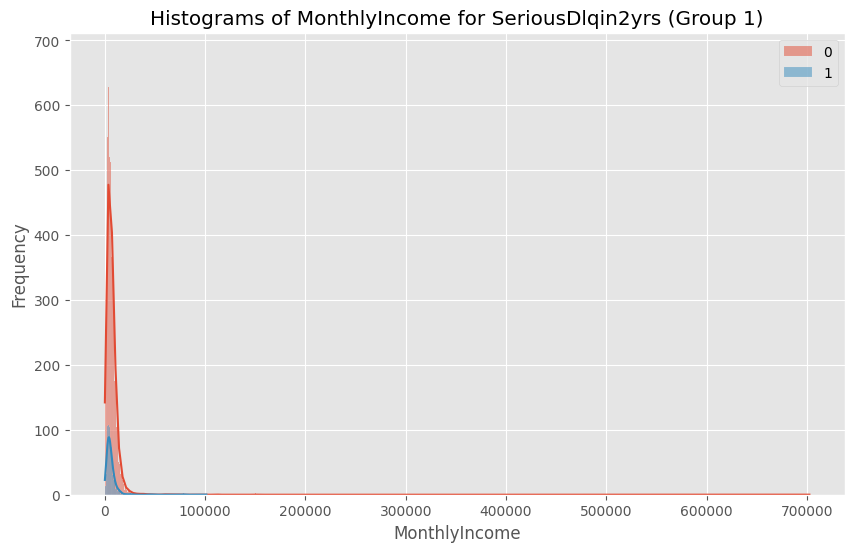

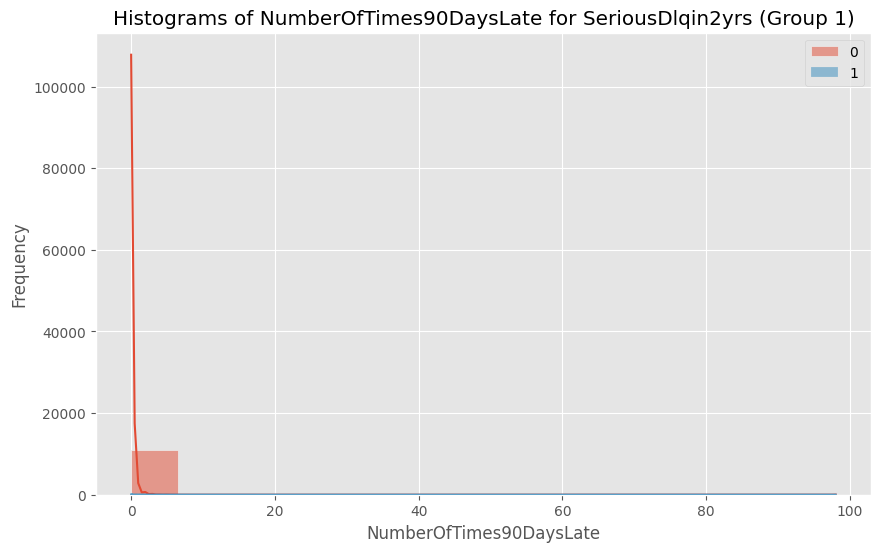

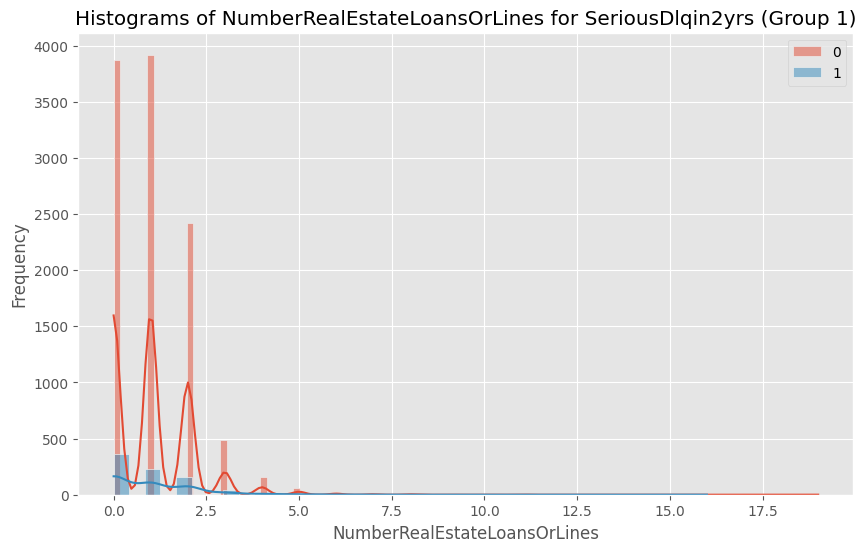

In [11]:
# Análisis bivariante Numérica-Categórica (target)
for col in var_numericas:
    bt.plot_grouped_histograms(df, cat_col = target, num_col = col, group_size = 2)

<Axes: >

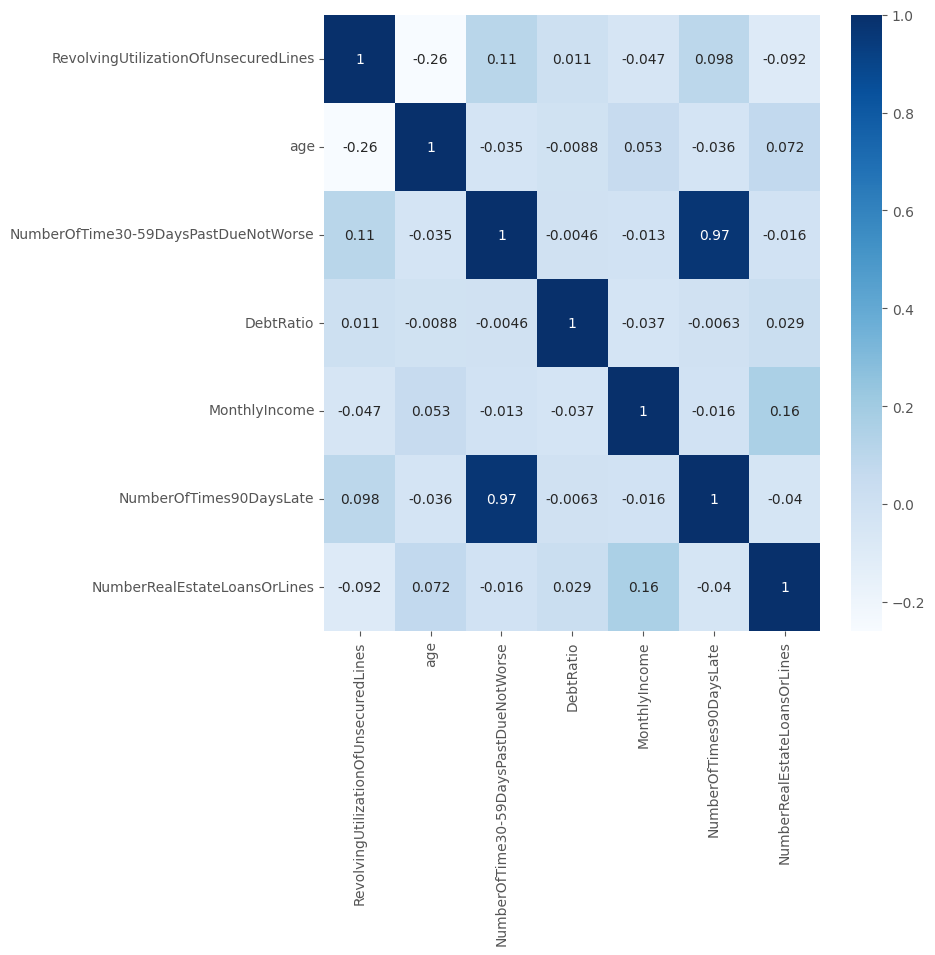

In [12]:
# Mapa de calor
corr= df[var_numericas].corr()
corr

plt.figure(figsize=(8,8))
sns.heatmap(corr[var_numericas], annot= True, cmap= "Blues")

 Variables sekleccionadas: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines']


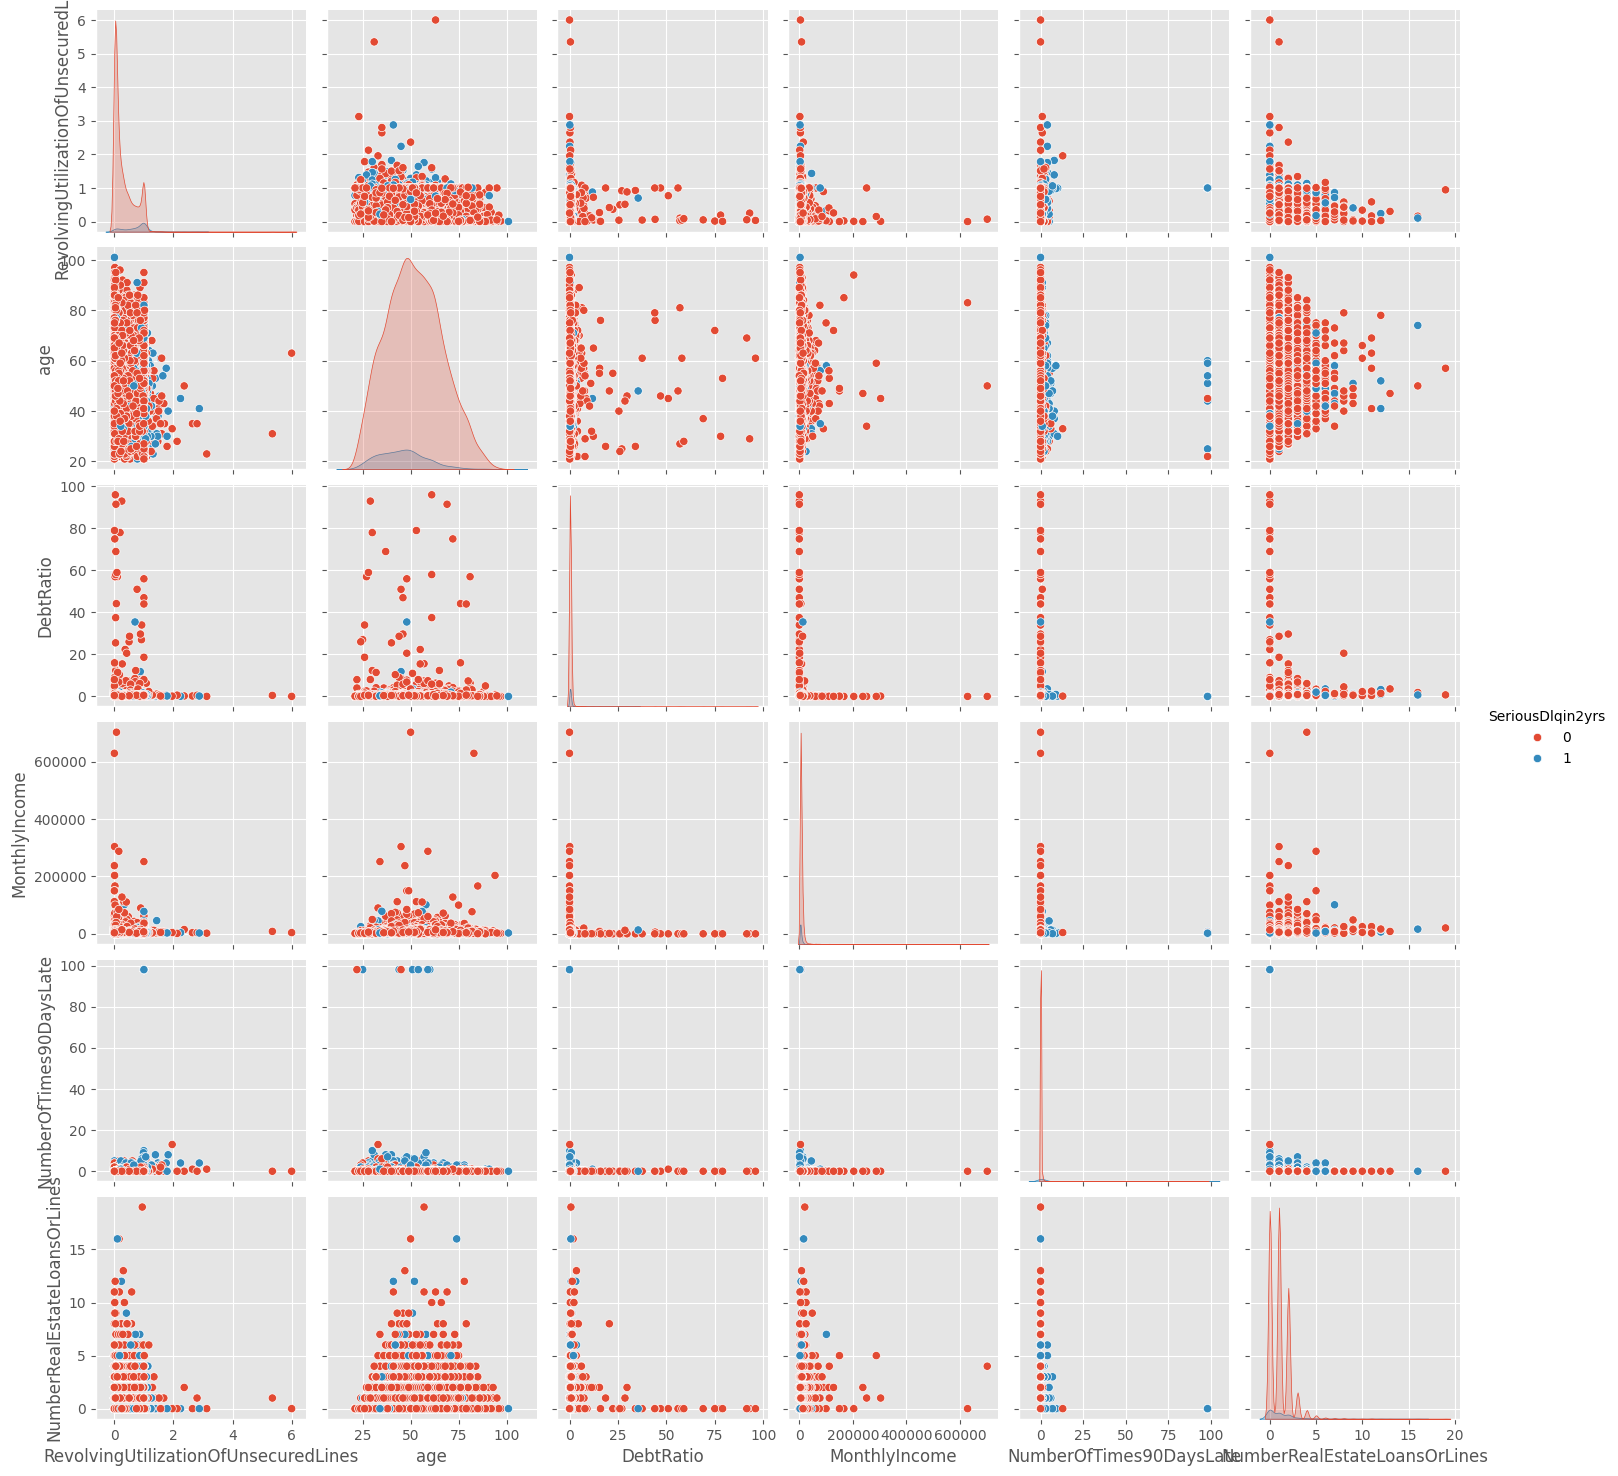

In [13]:
# Seleccionamos nuestras variables/features
# Elimino NumberOfTime30-59DaysPastDueNotWorse pues correlaciona much con NumberOfTimes90DaysLate
def eliminar_features(lista):
    return [x for x in lista if x != 'NumberOfTime30-59DaysPastDueNotWorse']

var_seleccionadas_1 = eliminar_features(variables)
var_numericas = eliminar_features(var_numericas)
print(f" Variables sekleccionadas: {var_seleccionadas_1}")

# Graficamos con un pairplot
sns.pairplot(df[var_numericas + [target]], hue=target)

   * Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

In [14]:
# Variables numéricas mediante SelectKBest y ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
import pandas as pd

# Extraemos X e y
X = df[var_numericas].copy()
y = df[target]

# Aplicamos SelectKBest con ANOVA F-test (ranking completo)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

scores = selector.scores_
pvalues = selector.pvalues_

# Creamos DataFrame con resultados ordenados
anova_results = pd.DataFrame({
    'variable': X.columns,
    'F_score': scores,
    'p_value': pvalues
}).sort_values(by='F_score', ascending=False)

print("Resultados SelectKBest (ANOVA):")
print(anova_results)

# Selección basada en p_value < 0.05
var_seleccionadas_2 = anova_results[anova_results['p_value'] < 0.05]['variable'].tolist()

print(f"Variables seleccionadas: {var_seleccionadas_2}")


Resultados SelectKBest (ANOVA):
                               variable      F_score        p_value
0  RevolvingUtilizationOfUnsecuredLines  1007.740824  2.652100e-212
4               NumberOfTimes90DaysLate   210.116019   3.291269e-47
1                                   age   134.446536   6.413858e-31
3                         MonthlyIncome     5.824786   1.581701e-02
2                             DebtRatio     0.032798   8.562901e-01
5          NumberRealEstateLoansOrLines     0.020601   8.858746e-01
Variables seleccionadas: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'age', 'MonthlyIncome']


In [15]:
# Variables/features categóricas mediante Mutual Information
from sklearn.metrics import mutual_info_score
for col in var_categoricas:
    print(f"MI({col};{target}):", mutual_info_score(df[col],df[target]))


MI(NumberOfOpenCreditLinesAndLoans;SeriousDlqin2yrs): 0.0019550587742729053
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.01984855135498301
MI(NumberOfDependents;SeriousDlqin2yrs): 0.0009172866374666383


* Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [16]:
# Seleccionamos utilizando SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separamos las variables predictoras y target
X = df[var_numericas].copy()
y = df[target]

# Creamos nuestro modelo base
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Creamos un selector con el modelo
selector = SelectFromModel(estimator=modelo, threshold="median")  # o "mean", o valor numérico

# Ajustamos el selector
selector.fit(X, y)

# Resultados
mask = selector.get_support()
var_seleccionadas_3 = X.columns[mask].tolist()

print("Variables seleccionadas:", var_seleccionadas_3)


Variables seleccionadas: ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']


* Selección de las mejores features empleando RFE.

In [17]:
# Selecciomamos utilizando RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # ejemplo de estimador para clasificación

X = df[var_numericas].copy()
y = df[target]

# Creamos nuestro modelo base (puedes cambiarlo por otro)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Creamos el selector RFE para seleccionar, por ejemplo, 5 mejores variables
selector = RFE(estimator=modelo, n_features_to_select=5)

# Ajustamos RFE
selector = selector.fit(X, y)

# Resultados
var_seleccionadas_4 = X.columns[selector.support_].tolist()

print("Variables seleccionadas con RFE:", var_seleccionadas_4)


Variables seleccionadas con RFE: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']


* Selección de las mejores features empleando SFS.

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier  # o cualquier estimador

X = df[var_numericas].copy()
y = df[target]

# Definimos nuestro modelo base
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Creamos el selector
sfs = SequentialFeatureSelector(modelo, 
                                n_features_to_select=5,  # número de features a seleccionar
                                direction='forward',     # forward = agregar variables
                                scoring='accuracy',      # métrica para evaluar (ajusta según problema)
                                cv=5,                   # validación cruzada 5 folds
                                n_jobs=-1)              # usa todos los cores disponibles

# Ajustamos el selector
sfs.fit(X, y)

# Resultados
var_seleccionadas_5 = X.columns[sfs.get_support()].tolist()

print("Variables seleccionadas con SFS:", var_seleccionadas_5)

Variables seleccionadas con SFS: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines']


* Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [20]:
from collections import Counter

listas = [var_seleccionadas_1, var_seleccionadas_2, var_seleccionadas_3, var_seleccionadas_4, var_seleccionadas_5]

# 1. Contar ocurrencias de cada variable en todas las listas
all_vars = [var for sublist in listas for var in sublist]
conteo = Counter(all_vars)

# 2. Establecer umbral mínimo de votos (por ejemplo, 3 de 5)
umbral = 3

# 3. Filtrar variables que cumplen el umbral
var_finales = [var for var, count in conteo.items() if count >= umbral]

print(f"Variables seleccionadas por hard voting (≥{umbral} votos):")
print(var_finales)


Variables seleccionadas por hard voting (≥3 votos):
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines']


3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.